# **Time-critical measures of the pupil flash response with Pupil Core on Mac and Windows**

In [4]:
import sys
sys.path.insert(0, '../../pyplr')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_context(context='poster', font_scale=1.4)

import analysis

In [2]:
datadir = '/Users/jtm/Projects/cvd_pupillometry/data/pfr_mac_windows'

In [3]:
mac = pd.read_csv(datadir + '/mac/sub001/analysis/plr_trial_metrics.csv')
win = pd.read_csv(datadir + '/win/sub001/analysis/plr_trial_metrics.csv')
for d in [mac, win]:
    d.drop('Unnamed: 0', axis=1, inplace=True)

Definitions:
```Python
    metrics = {
               'D1'        : baseline(s, onset_idx),
               'T1a'       : latency_to_constriction_a(s, sample_rate, onset_idx, pc),
               'T1b'       : latency_to_constriction_b(s, sample_rate, onset_idx),
               'T2'        : time_to_max_velocity(s, sample_rate, onset_idx),
               'T3'        : time_to_max_constriction(s, sample_rate, onset_idx),
               'T4'        : recovery_time_75pc(s, sample_rate, onset_idx),
               'D2'        : peak_constriction(s),
               'AMP'       : constriction_amplitude(s, onset_idx),
               'VelConMax' : max_constriction_velocity(s, sample_rate, onset_idx),
               'VelConAve' : average_constriction_velocity(s, sample_rate, onset_idx, pc),
               'AccConMax' : max_constriction_acceleration(s, sample_rate, onset_idx),
               'CT'        : constriction_time(s, sample_rate, onset_idx, pc),
               'VelRedMax' : max_redilation_velocity(s, sample_rate),
               'AccRedMax' : max_redilation_acceleration(s, sample_rate)
               }
```

In [33]:
mac.describe()

,D1,T1a,T1b,T2,T3,T4,D2,AMP,VelConMax,VelConAve,AccConMax,CT,VelRedMax,AccRedMax
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,7.279804,176.111111,157.222222,270.555556,1201.111111,2076.944444,4.155727,3.124077,8.693623,2.959537,68.562797,1025.000000,2.766582,14.235432
std,0.283558,66.369068,20.381107,20.025526,76.992478,642.182146,0.160401,0.224145,0.404721,0.239003,5.952656,97.108582,0.148583,2.691260
min,6.560242,0.000000,108.333333,225.000000,1041.666667,1241.666667,3.811663,2.696096,7.805875,2.449780,51.620505,808.333333,2.436018,9.467549
25%,7.168891,166.666667,141.666667,252.083333,1162.500000,1710.416667,4.062775,2.968864,8.500623,2.817828,66.223813,991.666667,2.661426,12.267874
50%,7.378293,191.666667,166.666667,275.000000,1220.833333,1975.000000,4.155446,3.176323,8.639744,2.987001,69.848750,1037.500000,2.756058,13.609864
75%,7.445441,216.666667,175.000000,283.333333,1258.333333,2325.000000,4.240936,3.320021,8.986295,3.114062,72.045739,1050.000000,2.878831,16.719303
max,7.651801,241.666667,183.333333,300.000000,1325.000000,3825.000000,4.477206,3.410144,9.597259,3.555459,79.106132,1291.666667,3.031764,19.326358


In [34]:
win.describe()

,D1,T1a,T1b,T2,T3,T4,D2,AMP,VelConMax,VelConAve,AccConMax,CT,VelRedMax,AccRedMax
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,6.888811,280.833333,270.000000,384.444444,1328.333333,2201.111111,4.049241,2.839570,7.761449,2.641213,60.508636,1047.500000,2.944715,22.047779
std,0.322449,115.887174,22.382088,16.628308,73.584991,637.278747,0.276412,0.187567,1.843726,0.319959,22.800573,138.013236,2.062215,28.717288
min,5.913271,0.000000,241.666667,350.000000,1025.000000,1333.333333,3.353448,2.382104,5.617924,1.571671,40.538949,741.666667,2.122849,8.373288
25%,6.750384,293.750000,266.666667,383.333333,1297.916667,1789.583333,3.859998,2.743838,7.376728,2.572929,53.188906,985.416667,2.325931,12.545366
50%,6.930183,325.000000,266.666667,383.333333,1337.500000,1962.500000,4.117269,2.862697,7.534744,2.690170,57.579044,1016.666667,2.393920,14.007026
75%,7.110789,333.333333,266.666667,383.333333,1377.083333,2627.083333,4.227651,2.976647,7.743168,2.758188,60.357537,1072.916667,2.513127,16.554847
max,7.413238,433.333333,383.333333,458.333333,1416.666667,3883.333333,4.523226,3.190510,17.144137,3.566309,178.111255,1400.000000,13.275194,153.868105


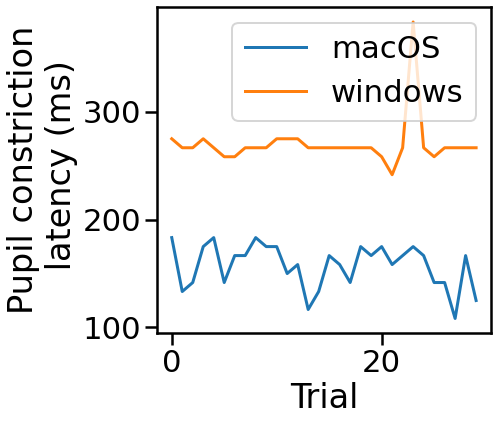

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6))

mac.T1b.plot(ax=ax, label='macOS')
win.T1b.plot(ax=ax, label='windows')

ax.set_xlabel('Trial');
ax.set_ylabel('Pupil constriction\n latency (ms)');
ax.legend()
fig.savefig('/Users/jtm/mac-vs-windows.png', bbox_inches='tight')

In [20]:
mac_lat = pd.read_csv(datadir + '/mac/near_IR_test/exports/000/annotations.csv')
w = mac_lat.loc[mac_lat['label']=='LIGHT_ON_WORLD']
e = mac_lat.loc[mac_lat['label']=='LIGHT_ON_EYE']
mac_diff = pd.Series((e.timestamp.to_numpy() - w.timestamp.to_numpy()) * 1000)

In [18]:
win_lat = pd.read_csv(datadir + '/win/near_IR_test/exports/000/annotations.csv')
w = win_lat.loc[win_lat['label']=='LIGHT_ON_WORLD']
e = win_lat.loc[win_lat['label']=='LIGHT_ON_EYE']
win_diff = pd.Series((e.timestamp.to_numpy() - w.timestamp.to_numpy()) * 1000)

In [21]:
diff = pd.DataFrame(win_diff)
diff.columns = ['windows']
diff['mac']  = mac_diff

In [22]:
diff = diff.melt(var_name='OS', value_name='Time Difference')

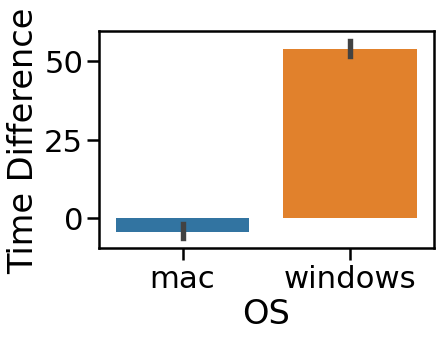

In [31]:
f = sns.barplot(x='OS', y='Time Difference', data=diff, order=['mac','windows'])
#f.set_title('Eye.1.timestamp - world.timestamp', fontsize=24)
plt.savefig('/Users/jtm/mac-vs-windows-near-IR-test.png', bbox_inches='tight')